<a href="https://colab.research.google.com/github/gguex/ISH_ressources_cours_ML/blob/main/TP7c_corrige.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import graphviz

In [ ]:
file_path = \
  "/content/drive/MyDrive/Colab Notebooks/ml_data/TP7/contraceptive.tsv"
data = pd.read_csv(file_path, sep="\t")
data

,Wife_age,Wife_education,Husband_education,Children,Wife_religion,Wife_working,Husband_occupation,Standard-of-living,Media_exposure,target
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [ ]:
occ_dummies = pd.get_dummies(data["Husband_occupation"], prefix="occ")
inputs = pd.concat([data.drop(["Husband_occupation", "target"], axis=1), 
                    occ_dummies], axis=1)  
outputs = data["target"]

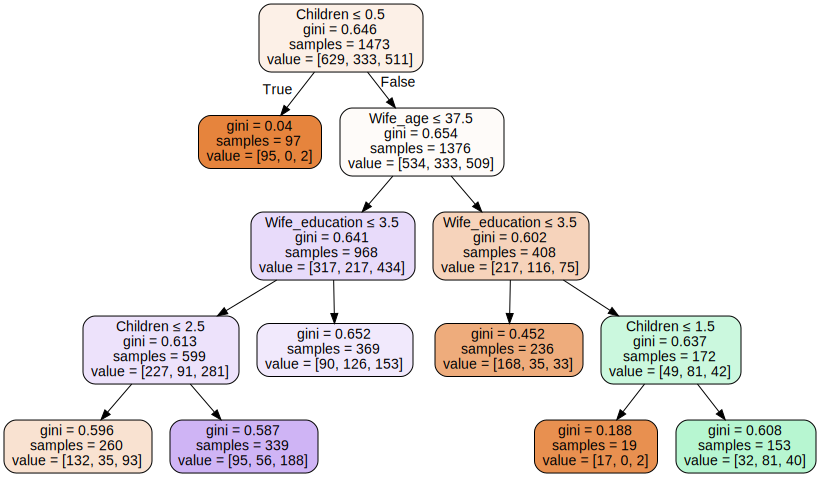

In [ ]:
classif_tree = tree.DecisionTreeClassifier(ccp_alpha=0.005).fit(inputs, outputs)
gvz_data = tree.export_graphviz(classif_tree, out_file=None, 
                                feature_names=inputs.columns,  
                                filled=True, rounded=True,  
                                special_characters=True) 
graph = graphviz.Source(gvz_data) 
graph

In [ ]:
inputs_tv, inputs_test, outputs_tv, outputs_test = train_test_split(inputs, 
                                                                    outputs)

In [ ]:
logreg_param = {"C": np.linspace(0.001, 2, 20)}
logreg_grid = GridSearchCV(LogisticRegression(max_iter=1e3), logreg_param).fit(
    inputs_tv, outputs_tv)

In [ ]:
print(f"Logreg best param: {logreg_grid.best_params_}")
print(f"Score: {logreg_grid.best_estimator_.score(inputs_test, outputs_test)}")

Logreg best param: {'C': 1.368736842105263}
Score: 0.5311653116531165


In [ ]:
forest_hyperp = {"max_depth": range(1, 11)}
forest_grid = GridSearchCV(RandomForestClassifier(), forest_hyperp).fit(
    inputs_tv, outputs_tv)

In [ ]:
print(f"Forest best param: {forest_grid.best_params_}")
print(f"Score: {forest_grid.best_estimator_.score(inputs_test, outputs_test)}")

Forest best param: {'max_depth': 8}
Score: 0.5555555555555556


In [ ]:
grad_hyperp = {"max_depth": range(1, 11)}
grad_grid = GridSearchCV(GradientBoostingClassifier(), grad_hyperp).fit(
    inputs_tv, outputs_tv)

In [ ]:
print(f"GB best param: {grad_grid.best_params_}")
print(f"Score: {grad_grid.best_estimator_.score(inputs_test, outputs_test)}")

GB best param: {'max_depth': 3}
Score: 0.5528455284552846


In [ ]:
grad_grid.best_estimator_.feature_importances_

array([0.29137732, 0.16047117, 0.03169581, 0.37762922, 0.01086114,
       0.01328421, 0.05682172, 0.0098502 , 0.02320377, 0.00625081,
       0.01077477, 0.00777988])

[]

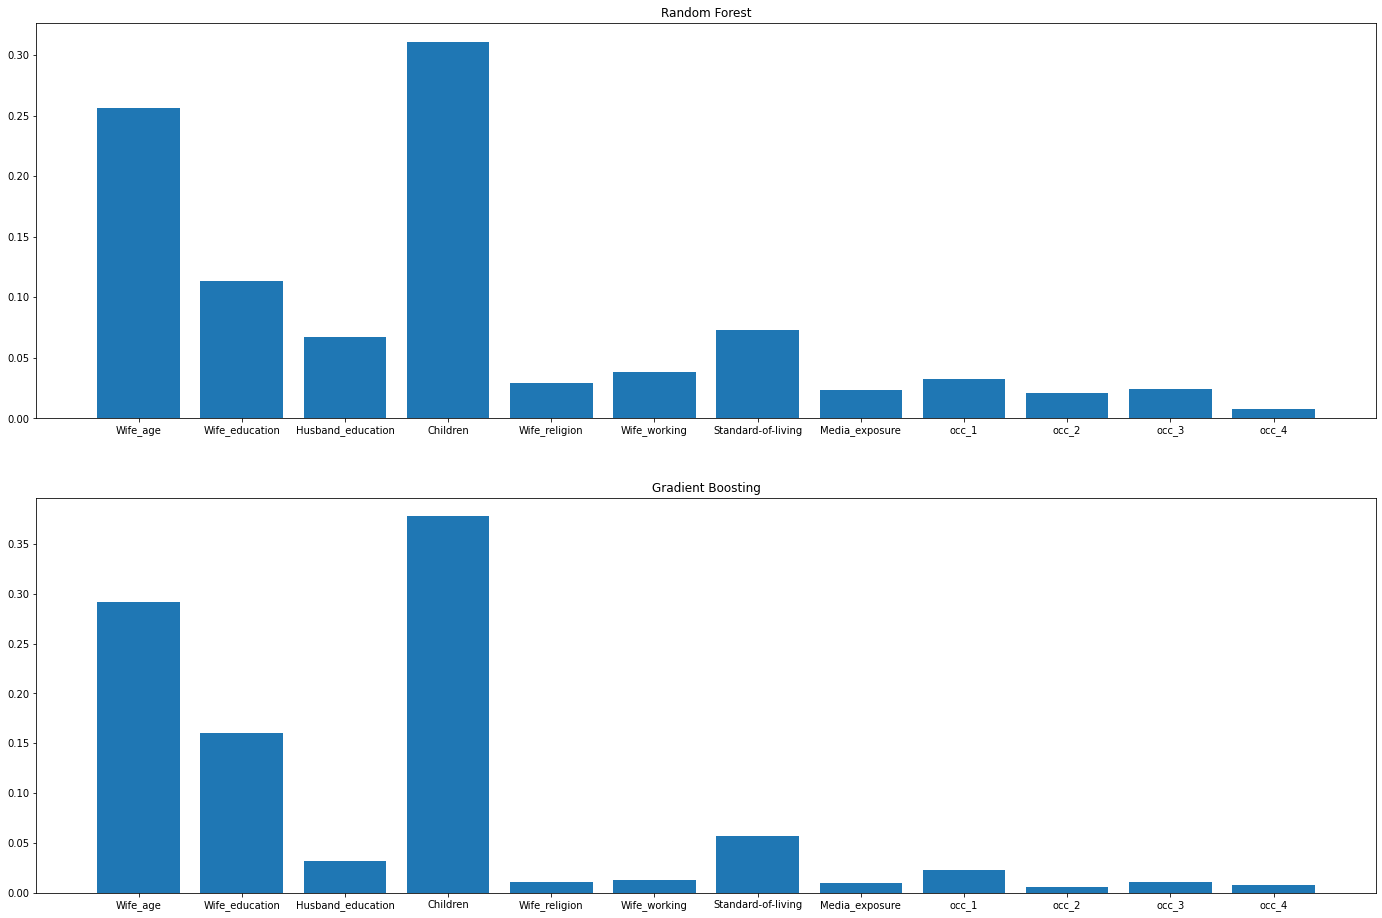

In [ ]:
plt.rcParams['figure.figsize'] = [24, 16]
fig, axs = plt.subplots(2, 1)
# Forest classification
axs[0].bar(inputs.columns, forest_grid.best_estimator_.feature_importances_)
axs[0].set_title("Random Forest")
# Gradient boosting
axs[1].bar(inputs.columns, grad_grid.best_estimator_.feature_importances_)
axs[1].set_title("Gradient Boosting")
plt.plot()